In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Drought_dataset_Chuadanga.csv")
df.head(10)

,Station,Year,Month,Temperature,Rainfall
0,Chuadanga,1994,1,18.80,9.00
1,Chuadanga,1994,2,24.80,15.44
2,Chuadanga,1994,3,28.90,35.33
3,Chuadanga,1994,4,32.90,47.11
4,Chuadanga,1994,5,34.70,119.11
5,Chuadanga,1994,6,31.00,225.78
6,Chuadanga,1994,7,30.25,366.89
7,Chuadanga,1994,8,30.80,209.56
8,Chuadanga,1994,9,30.25,321.44
9,Chuadanga,1994,10,29.30,186.67


In [3]:
df.drop(df[(df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [4]:
df.size

945

<Axes: xlabel='Year'>

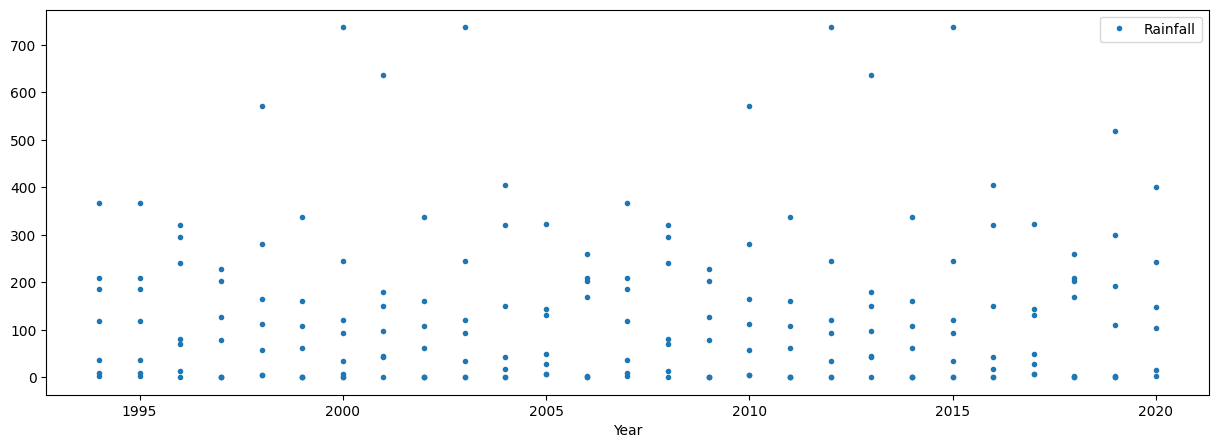

In [5]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

<Axes: xlabel='Year'>

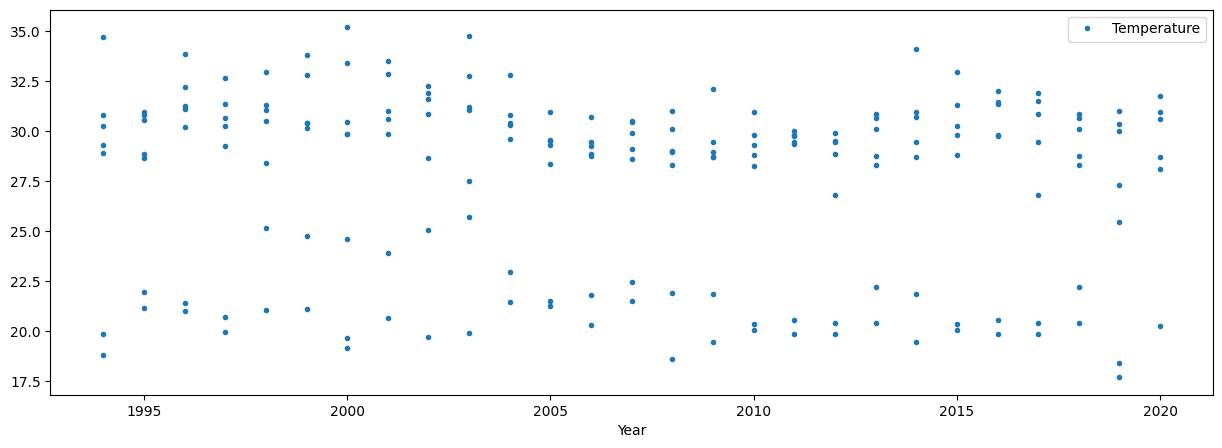

In [6]:
df.plot(x='Year',y='Temperature',style='.', figsize=(15,5))

In [7]:
train = df.loc[df['Year'] <= 2016]
test = df.loc[df['Year'] >= 2017]
train=train[train['Station']=='Chuadanga']
test=test[test['Station']=='Chuadanga']

In [8]:
train.size

810

In [9]:
X_train=train.drop(['Station', 'Month', 'Temperature', 'Rainfall'], axis=1)
Y_train=train['Rainfall']

In [10]:
X_test=test.drop(['Station', 'Month', 'Temperature', 'Rainfall'],axis=1)
Y_test=test['Rainfall']

In [11]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [73]:
df1_val = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1_val[df1_val['Predicted Rainfall']>=0]

,Actual Rainfall,Predicted Rainfall
276,27.0,64.575
278,6.0,64.575
280,48.0,64.575
282,322.0,64.575
283,143.0,64.575
285,132.0,64.575
287,7.0,64.575
288,3.0,62.850
290,1.0,62.850
292,260.0,62.850


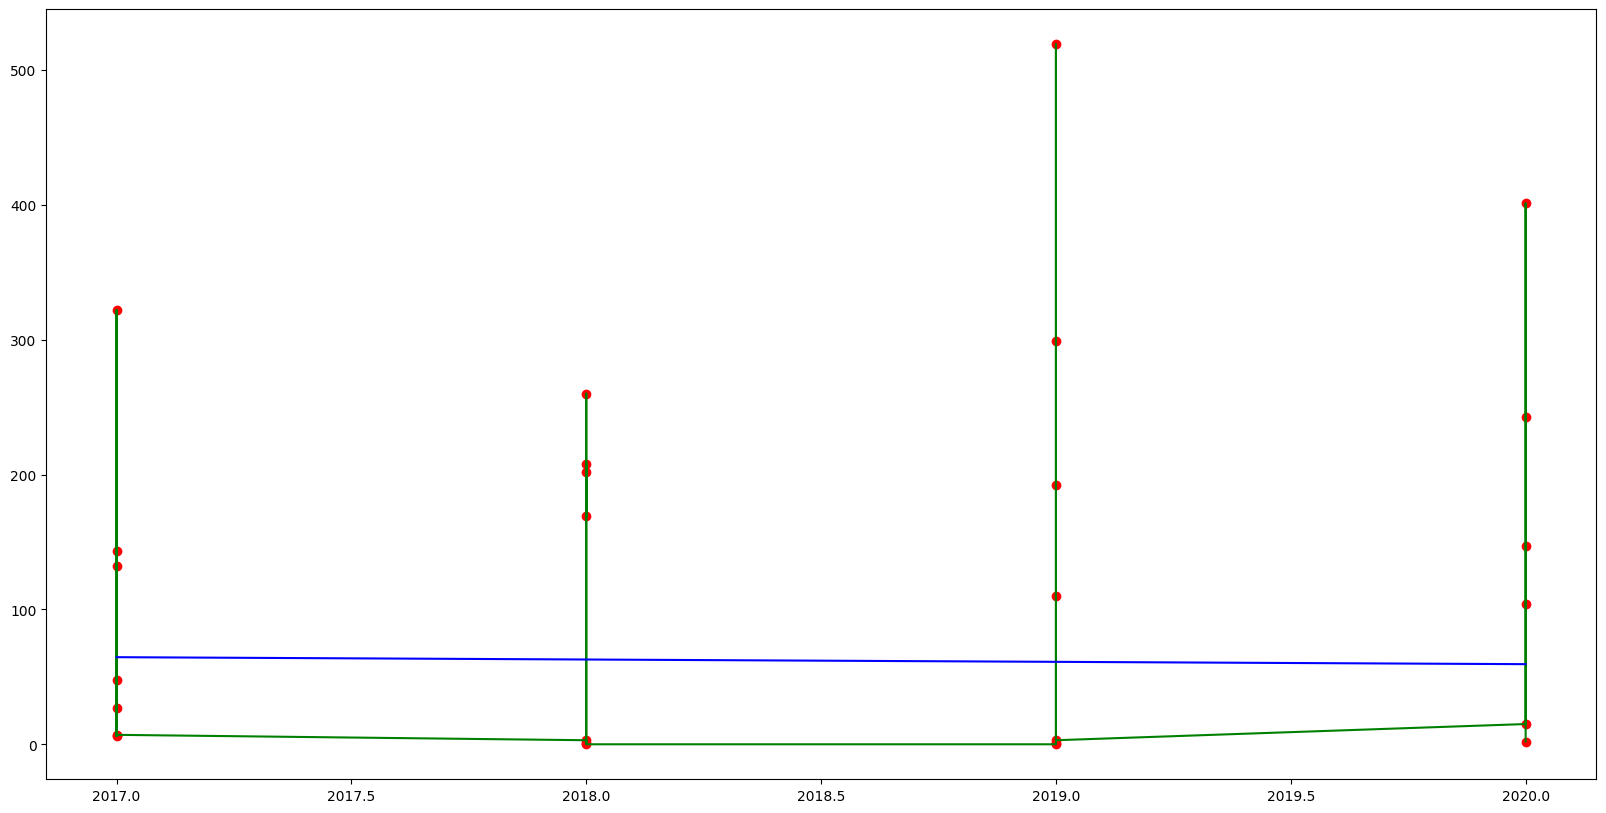

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test,color='red')
plt.plot(X_test['Year'],Y_test,color='green')
plt.plot(X_test['Year'],Y_pred,color='blue')

In [32]:
for i in range(2024,2031):
  Y_exp_pred = regressor.predict([[i]])
  df1 = pd.DataFrame({'Year': i, 'Predicted Rainfall': Y_exp_pred})  
  df1[df1['Predicted Rainfall']>=0]
  print(df1)

   Year  Predicted Rainfall
0  2024                52.5
   Year  Predicted Rainfall
0  2025              50.775
   Year  Predicted Rainfall
0  2026               49.05
   Year  Predicted Rainfall
0  2027              47.325
   Year  Predicted Rainfall
0  2028                45.6
   Year  Predicted Rainfall
0  2029              43.875
   Year  Predicted Rainfall
0  2030               42.15


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local

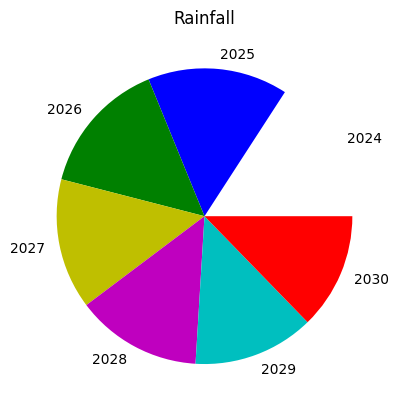

In [102]:
rainfall = [52.5, 50.775, 49.05, 47.325, 45.6, 43.875, 42.15]
year = ['2024','2025','2026','2027','2028', '2029', '2030']
col= ['w','b','g','y','m', 'c', 'r']

plt.pie(rainfall,labels=year, colors= col)

plt.title('Rainfall')

plt.show()

In [37]:
Y_train2=train['Temperature']

In [38]:
Y_test2=test['Temperature']

In [39]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train2)
Y_pred2 = regressor.predict(X_test)

In [74]:
df2_val = pd.DataFrame({'Actual Temperature': Y_test2, 'Predicted Temperature': Y_pred2})  
df2_val[df2_val['Predicted Temperature']>=0]

,Actual Temperature,Predicted Temperature
276,20.40,28.761905
278,26.80,28.761905
280,31.90,28.761905
282,30.85,28.761905
283,31.50,28.761905
285,29.45,28.761905
287,19.85,28.761905
288,20.40,28.692857
290,28.75,28.692857
292,30.85,28.692857


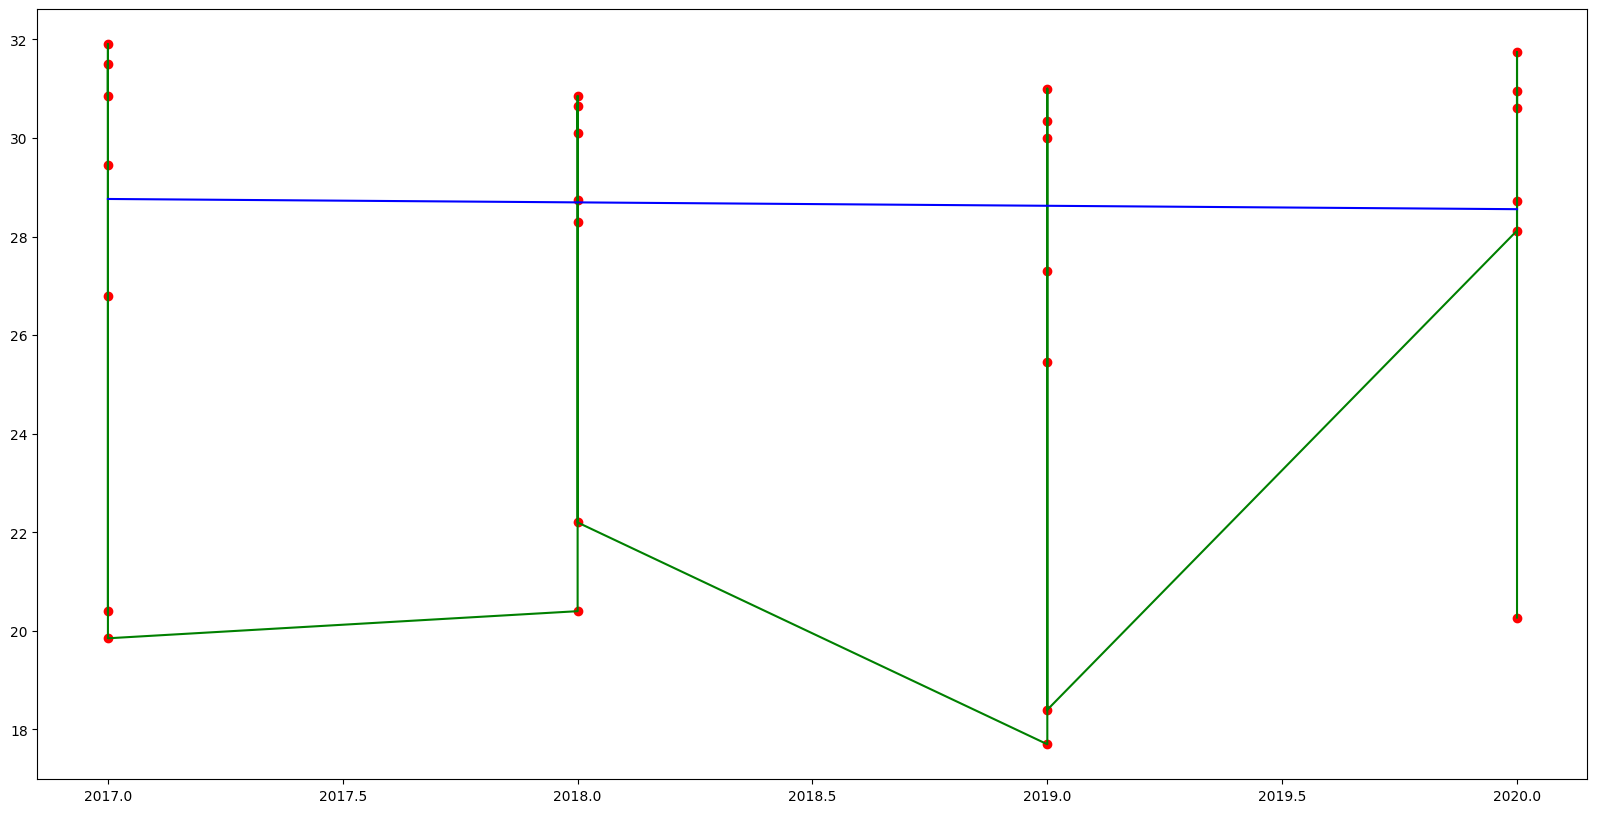

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test2,color='red')
plt.plot(X_test['Year'],Y_test2,color='green')
plt.plot(X_test['Year'],Y_pred2,color='blue')

In [64]:
for i in range(2024,2031):
  Y_exp_pred2 = regressor.predict([[i]])
  df2 = pd.DataFrame({'Year': i, 'Predicted Temperature': Y_exp_pred2})  
  df2[df2['Predicted Temperature']>=0]
  print(df2)

   Year  Predicted Temperature
0  2024              28.278571
   Year  Predicted Temperature
0  2025              28.209524
   Year  Predicted Temperature
0  2026              28.140476
   Year  Predicted Temperature
0  2027              28.071429
   Year  Predicted Temperature
0  2028              28.002381
   Year  Predicted Temperature
0  2029              27.933333
   Year  Predicted Temperature
0  2030              27.864286


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local

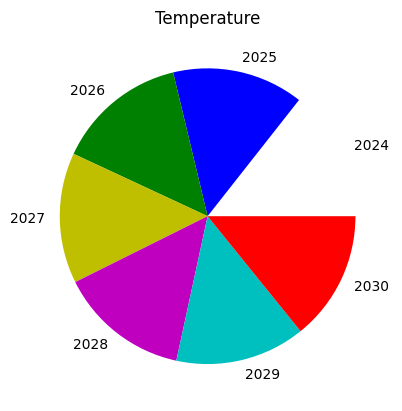

In [103]:
temperature = [28.278571, 28.209524, 28.140476, 28.071429, 28.002381, 27.933333, 27.864286]
year = ['2024','2025','2026','2027','2028', '2029', '2030']
col= ['w','b','g','y','m', 'c', 'r']

plt.pie(temperature,labels=year, colors= col)

plt.title('Temperature')

plt.show()

In [75]:
avg_Y_exp_pred = (52.5+50.775+49.05+47.325+45.6+43.875+42.15)/7
avg_Y_test = (27.0+6.0+48.0+322.0+143.0+132.0+7.0+3.0+1.0+260.0+169.0+202.0+208.0+0.0+0.0+1.0+192.0+519.0+299.0+110.0+3.0+15.0+147.0+401.0+243.0+104.0+2.0)/27
avg_Y_exp_pred2 = (28.278571+28.209524+28.140476+28.071429+28.002381+27.933333+27.864286)/7
avg_Y_test2 = (20.40+26.80+31.90+30.85+31.50+29.45+19.85+20.40+28.75+30.85+30.10+30.65+28.30+22.20+17.70+25.45+31.00+30.35+30.00+27.30+18.40+28.12+31.74+30.60+30.96+28.73+20.27)/27
drought_index = (avg_Y_test / avg_Y_exp_pred) * ((avg_Y_test2 / avg_Y_exp_pred2)**0.5)
print(drought_index)

2.742259529478452


In [78]:
drought_2024 = (avg_Y_test / 52.5) * ((avg_Y_test2 / 28.278571)**0.5)
drought_2025 = (avg_Y_test / 50.775) * ((avg_Y_test2 / 28.209524)**0.5)
drought_2026 = (avg_Y_test / 49.05) * ((avg_Y_test2 / 28.140476)**0.5)
drought_2027 = (avg_Y_test / 47.325) * ((avg_Y_test2 / 28.071429)**0.5)
drought_2028 = (avg_Y_test / 45.6) * ((avg_Y_test2 / 28.002381)**0.5)
drought_2029 = (avg_Y_test / 43.875) * ((avg_Y_test2 / 27.933333)**0.5)
drought_2030 = (avg_Y_test / 42.15) * ((avg_Y_test2 / 27.864286)**0.5)
print("Drought possibility in 2024:", drought_2024)
print("Drought possibility in 2025:", drought_2025)
print("Drought possibility in 2026:", drought_2026)
print("Drought possibility in 2027:", drought_2027)
print("Drought possibility in 2028:", drought_2028)
print("Drought possibility in 2029:", drought_2029)
print("Drought possibility in 2030:", drought_2030)

Drought possibility in 2024: 2.462880845841669
Drought possibility in 2025: 2.5496679408236846
Drought possibility in 2026: 2.642571233054802
Drought possibility in 2027: 2.742259508545173
Drought possibility in 2028: 2.849502953888852
Drought possibility in 2029: 2.9651927220858294
Drought possibility in 2030: 3.090365848767109


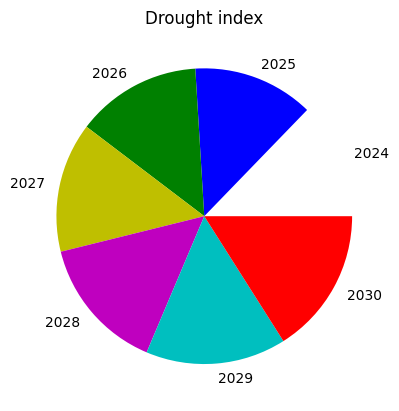

In [104]:
drought = [2.462880845841669, 2.5496679408236846, 2.642571233054802, 2.742259508545173, 2.849502953888852, 2.9651927220858294, 3.090365848767109]
year = ['2024','2025','2026','2027','2028', '2029', '2030']
col= ['w','b','g','y','m', 'c', 'r']

plt.pie(drought,labels=year, colors= col)

plt.title('Drought index')

plt.show()